<a href="https://colab.research.google.com/github/KamilBienias/data-science/blob/main/kursPawe%C5%82Krakowiak/machine-learning-bootcamp/supervised/02_regression/05_polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### scikit-learn
Strona biblioteki: [https://scikit-learn.org](https://scikit-learn.org)  

Dokumentacja/User Guide: [https://scikit-learn.org/stable/user_guide.html](https://scikit-learn.org/stable/user_guide.html)

Podstawowa biblioteka do uczenia maszynowego w języku Python.

Aby zainstalować bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install scikit-learn
```
Aby zaktualizować do najnowszej wersji bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install --upgrade scikit-learn
```
Kurs stworzony w oparciu o wersję `0.22.1`

### Spis treści:
1. [Import bibliotek](#0)
2. [Polynomial Regression - Regresja Wielomianowa](#1)
3. [Wygenerowanie danych](#2)
4. [Model liniowy](#3)
5. [Ekstrakcja cech wielomianowych - stopień 2](#4)
6. [Dopasowanie modelu](#5)
7. [Ekstrakcja cech wielomianowych - stopień 3](#6)
8. [Dopasowanie modelu](#7)
9. [Porównanie metryk](#8)

### <a name='0'></a> Import bibliotek

In [14]:
print("############################################################")
print("Etap7. Odcinek: Regresja wielomianowa - ćwiczenie")

# Wykład:

# Model regresji wielomianowej jest w klasie liniowej.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn

np.random.seed(42)
np.set_printoptions(precision=6, suppress=True)
sns.set(font_scale=1.3)
sklearn.__version__

############################################################
Etap7. Odcinek: Regresja wielomianowa - ćwiczenie


'0.22.2.post1'

### <a name='1'></a> Polynomial Regression - Regresja Wielomianowa
Powszechnym wzorcem stosowanym w uczeniu maszynowym jest użycie modeli liniowych wytrenowanych na nieliniowych funkcjach danych. Podejscie to utrzymuje szybkie działanie metod liniowych i zarazem umożliwia stosowanie metod liniowych dla znacznie szerszego zakresu danych.

Przykładowo, prosta regresja liniowa może zostać zastosowana przez skonstruowanie cech wielomianowych do modelów nieliniowych.

To implikuje fakt, iż nasz model regresji wielomianowej znajduje się w klasie modeli liniowych i może być rozwiązany za pomocą tych samych technik. 

### Rozważmy model regresji liniowej: $Y=w_0+w_1X_1$


### <a name='2'></a> Wygenerowanie danych

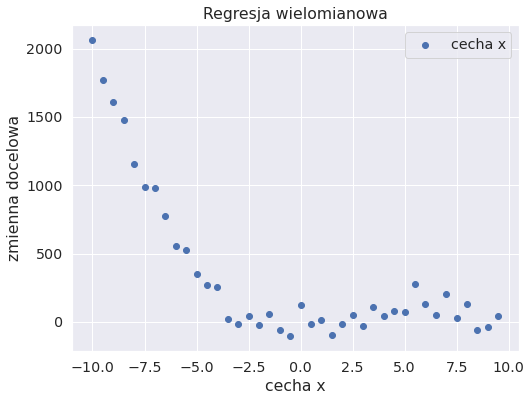

In [15]:
# 40 liczb od -10 do 9.5 w odstępach co 0.5
X = np.arange(-10, 10, 0.5)
# nie mogę użyć range bo start, stop i step mają być w niej całkowite
# X = range(-10, 10, 0.5)
# szumem jest 40 liczb z rozkładu N(0,80)
noise = 80 * np.random.randn(40)
# y to wielomian stopnia 3
y = -X**3 + 10*X**2 - 2*X + 3 + noise
X = X.reshape(40, 1)

plt.figure(figsize=(8, 6))
plt.title('Regresja wielomianowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X, y, label='cecha x')
plt.legend()
plt.show()

### <a name='3'></a> Model liniowy

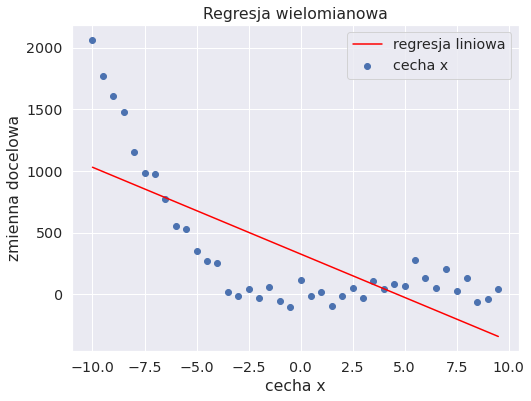

In [16]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
# bez dzielenia na train i test (dla uproszczenia)
regressor.fit(X, y)
# predykcja na podstawie modelu liniowego
y_pred_lin = regressor.predict(X)

plt.figure(figsize=(8, 6))
plt.title('Regresja wielomianowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X, y, label='cecha x')
plt.plot(X, y_pred_lin, c='red', label='regresja liniowa')
plt.legend()
plt.show()

In [17]:
from sklearn.metrics import r2_score

r2_score(y, y_pred_lin)

0.5342822962632471

Model jest niedouczony (underfitting). Potrzebujemy zwiekszyć złożoność modelu dla naszego problemu.

Rozważmy model regresji liniowej:
$$Y = w_0 + w_1 X_1$$
Dodając cechy wielomianowe otrzymujemy:
$$Y = w_0 + w_1 X_1 +w_2X_1^2 $$
Wyobraźmy sobie teraz nastepujące podstawienie:
$$Z = [1, X_1, X_1^2]$$
Wrzucając to z powrotem do naszego modelu otrzymujemy prosty model liniowy:
$$Y = w_0 + w_1 Z_1 + w_2 Z_2$$

###  <a name='4'></a> Ekstrakcja cech wielomianowych - stopień 2

In [9]:
print("Typ X: ", type(X))
print("X przed zapisem do df jest listą list =")
print(X)

print()
print("Dlatego trzeba połączyć te listy w jedną używając ravel i dopiero zapisać do df.")
print("X.ravel() =")
print(X.ravel())

print()
print("Ten sam rezultat co X.reshape(-1) =")
print(X.reshape(-1))

print()
print("df =")
df = pd.DataFrame(data={'X': X.ravel()})
print(df.head(10))

Typ X:  <class 'numpy.ndarray'>
X przed zapisem do df jest listą list =
[[-10. ]
 [ -9.5]
 [ -9. ]
 [ -8.5]
 [ -8. ]
 [ -7.5]
 [ -7. ]
 [ -6.5]
 [ -6. ]
 [ -5.5]
 [ -5. ]
 [ -4.5]
 [ -4. ]
 [ -3.5]
 [ -3. ]
 [ -2.5]
 [ -2. ]
 [ -1.5]
 [ -1. ]
 [ -0.5]
 [  0. ]
 [  0.5]
 [  1. ]
 [  1.5]
 [  2. ]
 [  2.5]
 [  3. ]
 [  3.5]
 [  4. ]
 [  4.5]
 [  5. ]
 [  5.5]
 [  6. ]
 [  6.5]
 [  7. ]
 [  7.5]
 [  8. ]
 [  8.5]
 [  9. ]
 [  9.5]]

Dlatego trzeba połączyć te listy w jedną używając ravel i dopiero zapisać do df.
X.ravel() =
[-10.   -9.5  -9.   -8.5  -8.   -7.5  -7.   -6.5  -6.   -5.5  -5.   -4.5
  -4.   -3.5  -3.   -2.5  -2.   -1.5  -1.   -0.5   0.    0.5   1.    1.5
   2.    2.5   3.    3.5   4.    4.5   5.    5.5   6.    6.5   7.    7.5
   8.    8.5   9.    9.5]

Ten sam rezultat co X.reshape(-1) =
[-10.   -9.5  -9.   -8.5  -8.   -7.5  -7.   -6.5  -6.   -5.5  -5.   -4.5
  -4.   -3.5  -3.   -2.5  -2.   -1.5  -1.   -0.5   0.    0.5   1.    1.5
   2.    2.5   3.    3.5   4.    4.5   5.    

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
# tworzy kolumny 1, X, X^2
X_poly_2 = poly.fit_transform(X)
X_poly_2

array([[  1.  , -10.  , 100.  ],
       [  1.  ,  -9.5 ,  90.25],
       [  1.  ,  -9.  ,  81.  ],
       [  1.  ,  -8.5 ,  72.25],
       [  1.  ,  -8.  ,  64.  ],
       [  1.  ,  -7.5 ,  56.25],
       [  1.  ,  -7.  ,  49.  ],
       [  1.  ,  -6.5 ,  42.25],
       [  1.  ,  -6.  ,  36.  ],
       [  1.  ,  -5.5 ,  30.25],
       [  1.  ,  -5.  ,  25.  ],
       [  1.  ,  -4.5 ,  20.25],
       [  1.  ,  -4.  ,  16.  ],
       [  1.  ,  -3.5 ,  12.25],
       [  1.  ,  -3.  ,   9.  ],
       [  1.  ,  -2.5 ,   6.25],
       [  1.  ,  -2.  ,   4.  ],
       [  1.  ,  -1.5 ,   2.25],
       [  1.  ,  -1.  ,   1.  ],
       [  1.  ,  -0.5 ,   0.25],
       [  1.  ,   0.  ,   0.  ],
       [  1.  ,   0.5 ,   0.25],
       [  1.  ,   1.  ,   1.  ],
       [  1.  ,   1.5 ,   2.25],
       [  1.  ,   2.  ,   4.  ],
       [  1.  ,   2.5 ,   6.25],
       [  1.  ,   3.  ,   9.  ],
       [  1.  ,   3.5 ,  12.25],
       [  1.  ,   4.  ,  16.  ],
       [  1.  ,   4.5 ,  20.25],
       [  

In [ ]:
X_poly.shape

NameError: ignored

In [ ]:
df = pd.DataFrame(X_poly)
df.columns = ['1', 'x', 'x^2']
df.head(10)

###  <a name='5'></a> Dopasowanie modelu

In [ ]:
regressor_poly_2 = LinearRegression()
regressor_poly_2.fit(X_poly, y)

y_pred_2 = regressor_poly_2.predict(X_poly)

plt.figure(figsize=(8, 6))
plt.title('Regresja wielomianowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X, y, label='cecha x')
plt.plot(X, y_pred_lin, c='red', label='regresja liniowa')
plt.plot(X, y_pred_2, c='green', label='regresja wielomianowa, st. 2')
plt.legend()
plt.show()

In [ ]:
r2_score(y, y_pred_2)

###  <a name='6'></a> Ekstrakcja cech wielomianowych - stopień 3

In [ ]:
poly = PolynomialFeatures(degree=3)

# znowu jedną kolumnę X transformuję. Tym razem na kolumny 1, X, X^2, X^3
X_poly_3 = poly.fit_transform(X)
X_poly_3

###  <a name='7'></a> Dopasowanie modelu

In [ ]:
regressor_poly_3 = LinearRegression()
regressor_poly_3.fit(X_poly_3, y)

y_pred_3 = regressor_poly_3.predict(X_poly_3)

plt.figure(figsize=(8, 6))
plt.title('Regresja wielomianowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X, y, label='cecha x')
plt.plot(X, y_pred_lin, c='red', label='regresja liniowa')
plt.plot(X, y_pred_2, c='green', label='regresja wielomianowa, st. 2')
plt.plot(X, y_pred_3, c='orange', label='regresja wielomianowa, st. 3')
plt.legend()
plt.show()

In [ ]:
r2_score(y, y_pred_3)

In [ ]:
# przypomnienie
r2_score(y, y_pred_lin)

###  <a name='8'></a> Porównanie metryk

In [ ]:
# mae to mean absolute error czyli średni błąd absolutny
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

In [ ]:
results = pd.DataFrame(data={
    'name': ['regresja liniowa', 'regresja wielomianowa st. 2', 'regresja wielomianowa st. 3'],
    'r2_score': [r2_score(y, y_pred_lin), r2_score(y, y_pred_2), r2_score(y, y_pred_3)],
    'mae': [mae(y, y_pred_lin), mae(y, y_pred_2), mae(y, y_pred_3)],
    'mse': [mse(y, y_pred_lin), mse(y, y_pred_2), mse(y, y_pred_3)],
    'rmse': [np.sqrt(mse(y, y_pred_lin)), np.sqrt(mse(y, y_pred_2)), np.sqrt(mse(y, y_pred_3))]    
    })
results

In [ ]:
px.bar(results, x='name', y='r2_score', width=700, title='Regresja wielomianowa - R2_score')

In [ ]:
px.bar(results, x='name', y='mae', width=700, title='Regresja wielomianowa - mean absolute error')

In [ ]:
px.bar(results, x='name', y='mse', width=700, title='Regresja wielomianowa - mean squared error')

In [ ]:
px.bar(results, x='name', y='rmse', width=700, title='Regresja wielomianowa - root mean squared error')